# **Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means Clustering**

**Part B: Introducing some feature engineering techniques**


In this brief project, adapted from [DataCamp](https://app.datacamp.com/learn/projects/1809), I utilize an unsupervised learning model (K - means clustering) to cluster penguins dataset species. This time I include some feature engineering aspects (polynomials) and implement principal components annalysis for dimensionality reduction.



$\,$

This is part B for the already available project:  **Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means Clustering**. Therefore,  we skip the formalities, nitty-gritty, prologue, scene-setting, preliminaries and what not, and  dive straight away  into business.

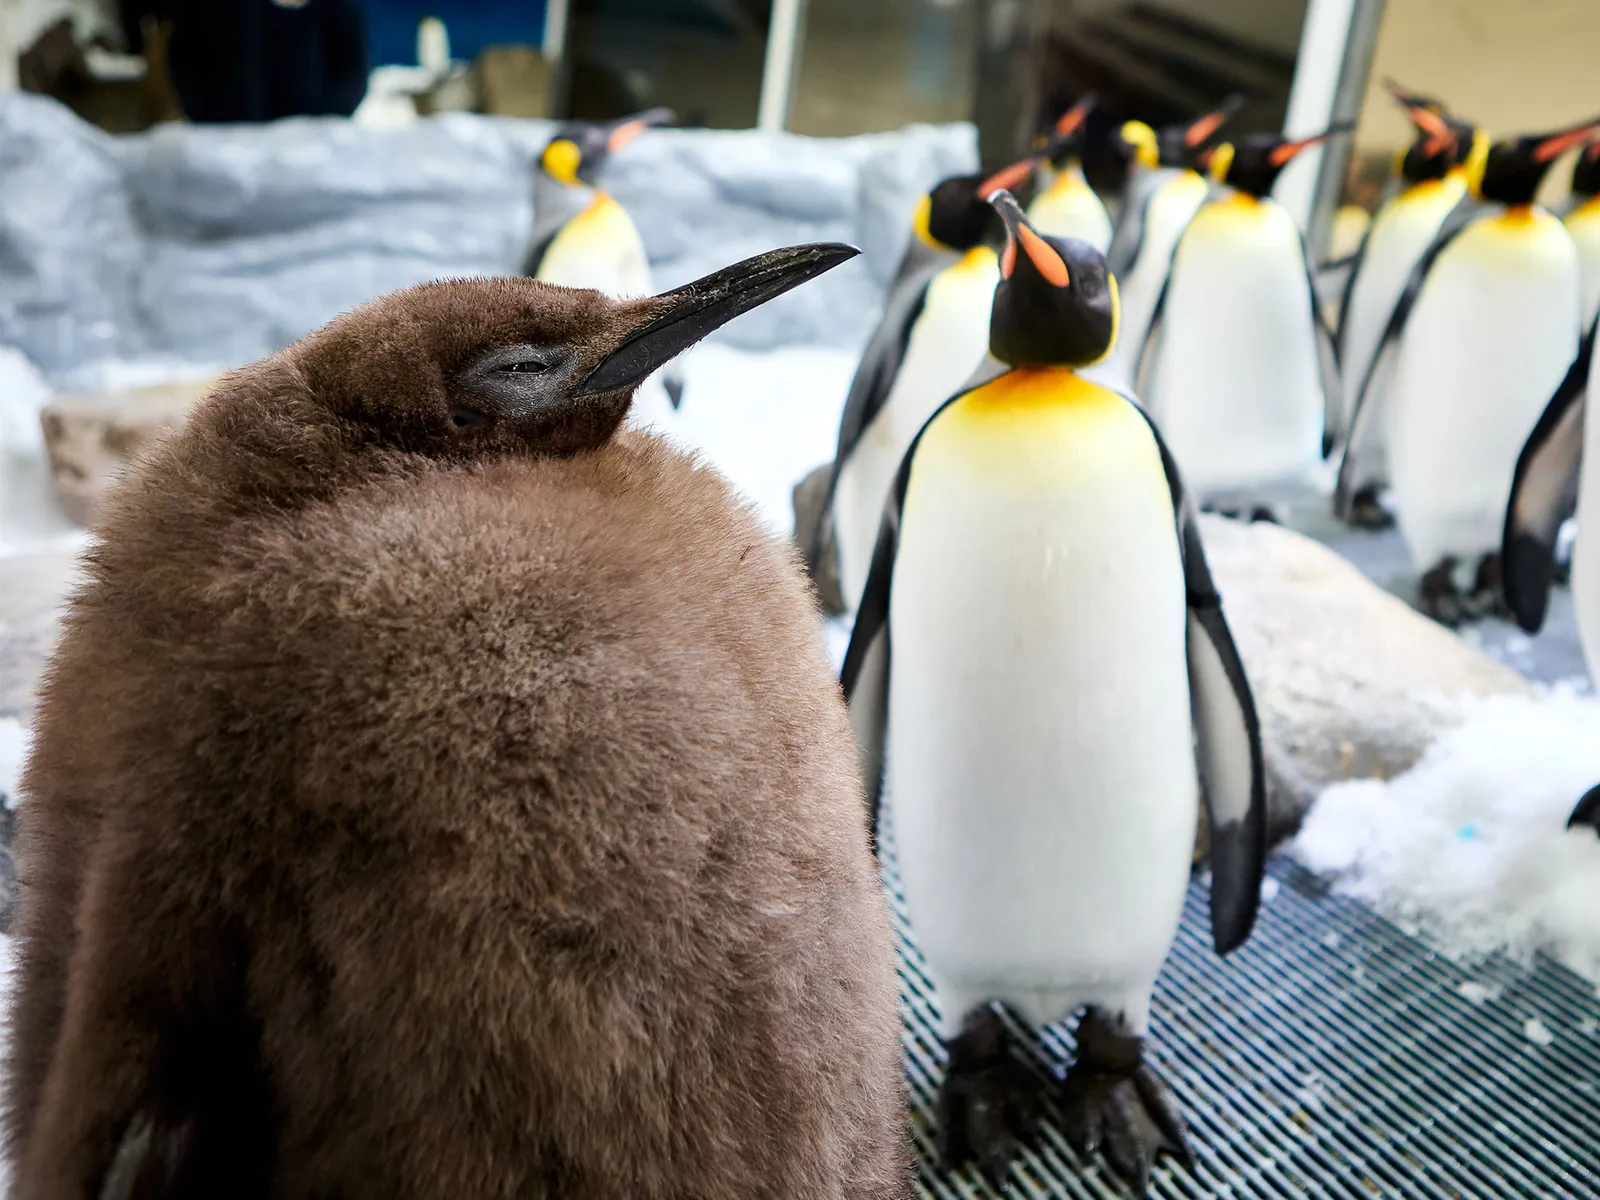

**Important Info**


Origin of this data : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three species** that are native to the region: Adelie, Chinstrap, and Gentoo. My task is to apply my impeccable data science skills to help them identify groups in the dataset!

Since There are at least three species, we focus on k greater or equal (>=) to 3.

In [ ]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

In [ ]:

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")

# Print info
print(penguins_df.info(), '\n')
penguins_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None 



,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [ ]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
# Step 2 - Perform preprocessing steps on the dataset to create dummy variables
# Convert categorical variables into dummy/indicator variables
penguins_df = pd.get_dummies(penguins_df, dtype='int') # dtype='int' ensure the output will be 0/1 instead of True/False
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,1,0
328,46.8,14.3,215.0,4850.0,1,0
329,50.4,15.7,222.0,5750.0,0,1
330,45.2,14.8,212.0,5200.0,1,0


In [ ]:
# Step 3 - Perform preprocessing steps on the dataset - standarizing/scaling
# Scaling variables (also called standardizing) is recommended before performing a clustering algorithm since this can increase the performance greatly (see https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=X,columns=penguins_df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,1.006042,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,-0.993994,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,1.006042,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,-0.993994,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,1.006042,-1.006042


In determining **optimal cluster**, we will start with the **Elbow Method** (from the graph), thereafter validate with **Silhouette Score**.

With the "elbow point" where the inertia (sum of squared errors) stops decreasing significantly, there stays our optimal k-cluster.

Higher Silhouette Score (closer to 1) means better clustering, and
if multiple values have high scores, we consider the one that concides with the Elbow Method.


Silhouette Scores:
k=3, Silhouette Score: 0.4779463057992955
k=4, Silhouette Score: 0.5744211864819234
k=5, Silhouette Score: 0.5008736130089106
k=6, Silhouette Score: 0.5024889551468739
k=7, Silhouette Score: 0.44905488501440843
k=8, Silhouette Score: 0.4535485207884143
k=9, Silhouette Score: 0.447144387237885



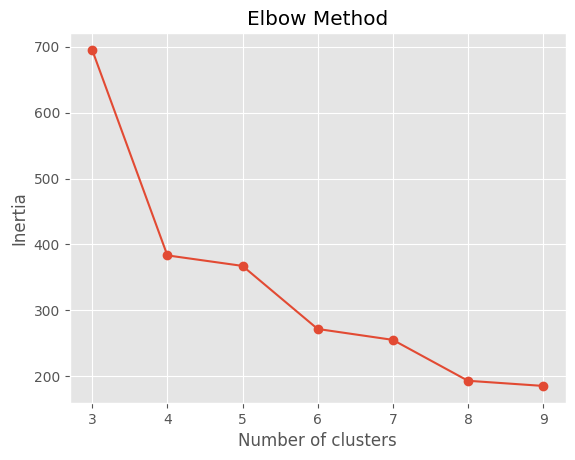


  Based on the score, k=4 is the best choice 



In [ ]:
from sklearn.metrics import silhouette_score


# Step 4 - Detect the optimal number of clusters for k-means clustering
inertia = []
print()
for k in range(3, 10): # Start from 2 since silhouette score isn't defined for k=1, also we have at least 3 species, thus = 3.
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_preprocessed)
    if k == 3:
        print(f'Silhouette Scores:')
    score = silhouette_score(penguins_preprocessed, kmeans.labels_)
    inertia.append(kmeans.inertia_)
    print(f'k={k}, Silhouette Score: {score}')
print()
plt.plot(range(3, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



print(f'\n  Based on the score, k=4 is the best choice \n')
n_clusters = 4

# Step 5 - Run the k-means clustering algorithm
# with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

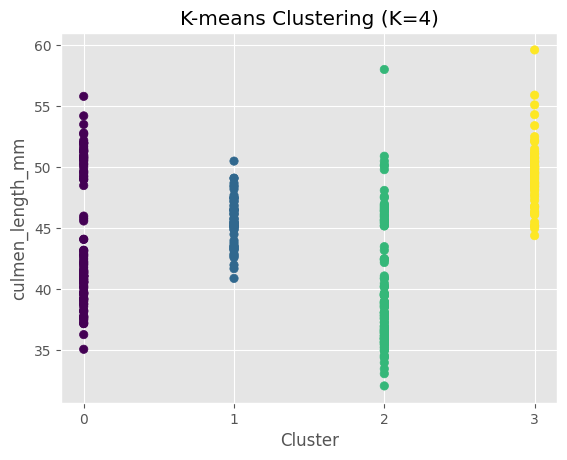

In [ ]:
# Step 5 - Run the k-means clustering algorithm
# with the optimal number of clusters

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

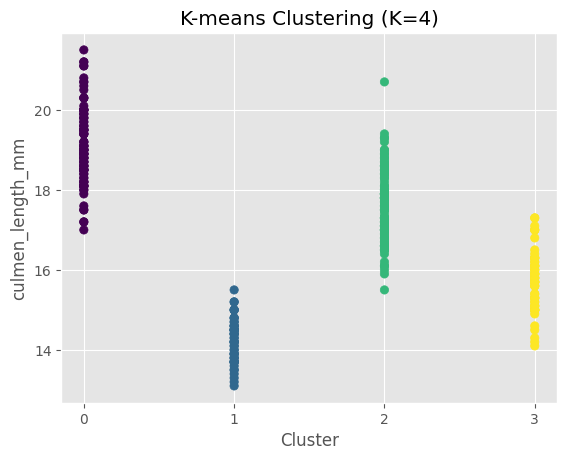

In [ ]:
# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['label'], penguins_df['culmen_depth_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

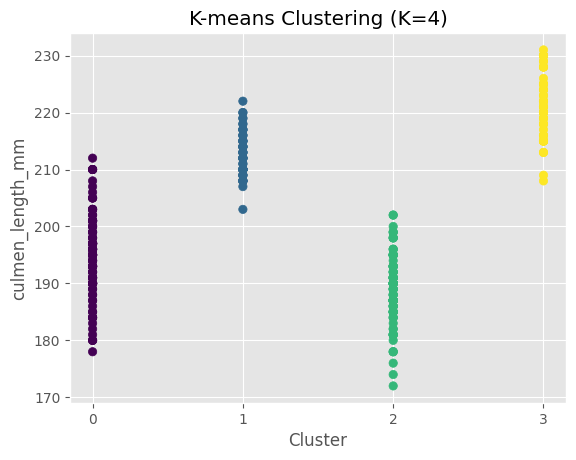

In [ ]:
# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['label'], penguins_df['flipper_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

In [ ]:
# Step - create final `stat_penguins` DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,45.563793,14.237931,212.706897
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984



$\,$
$\,$
$\,$
$\,$






---



---



---



---




$\,$
$\,$
$\,$
$\,$




---



---



---



---


$\,$
$\,$
$\,$
$\,$




# Part B: Engineering New Features (Polynomials, Sine and Cosine) and Implementing PCA



In [ ]:
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [ ]:
# Step 2 - Perform preprocessing steps on the dataset to create dummy variables
# Convert categorical variables into dummy/indicator variables
penguins_df = pd.get_dummies(penguins_df, dtype='int') # dtype='int' ensure the output will be 0/1 instead of True/False
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,1,0
328,46.8,14.3,215.0,4850.0,1,0
329,50.4,15.7,222.0,5750.0,0,1
330,45.2,14.8,212.0,5200.0,1,0


[]

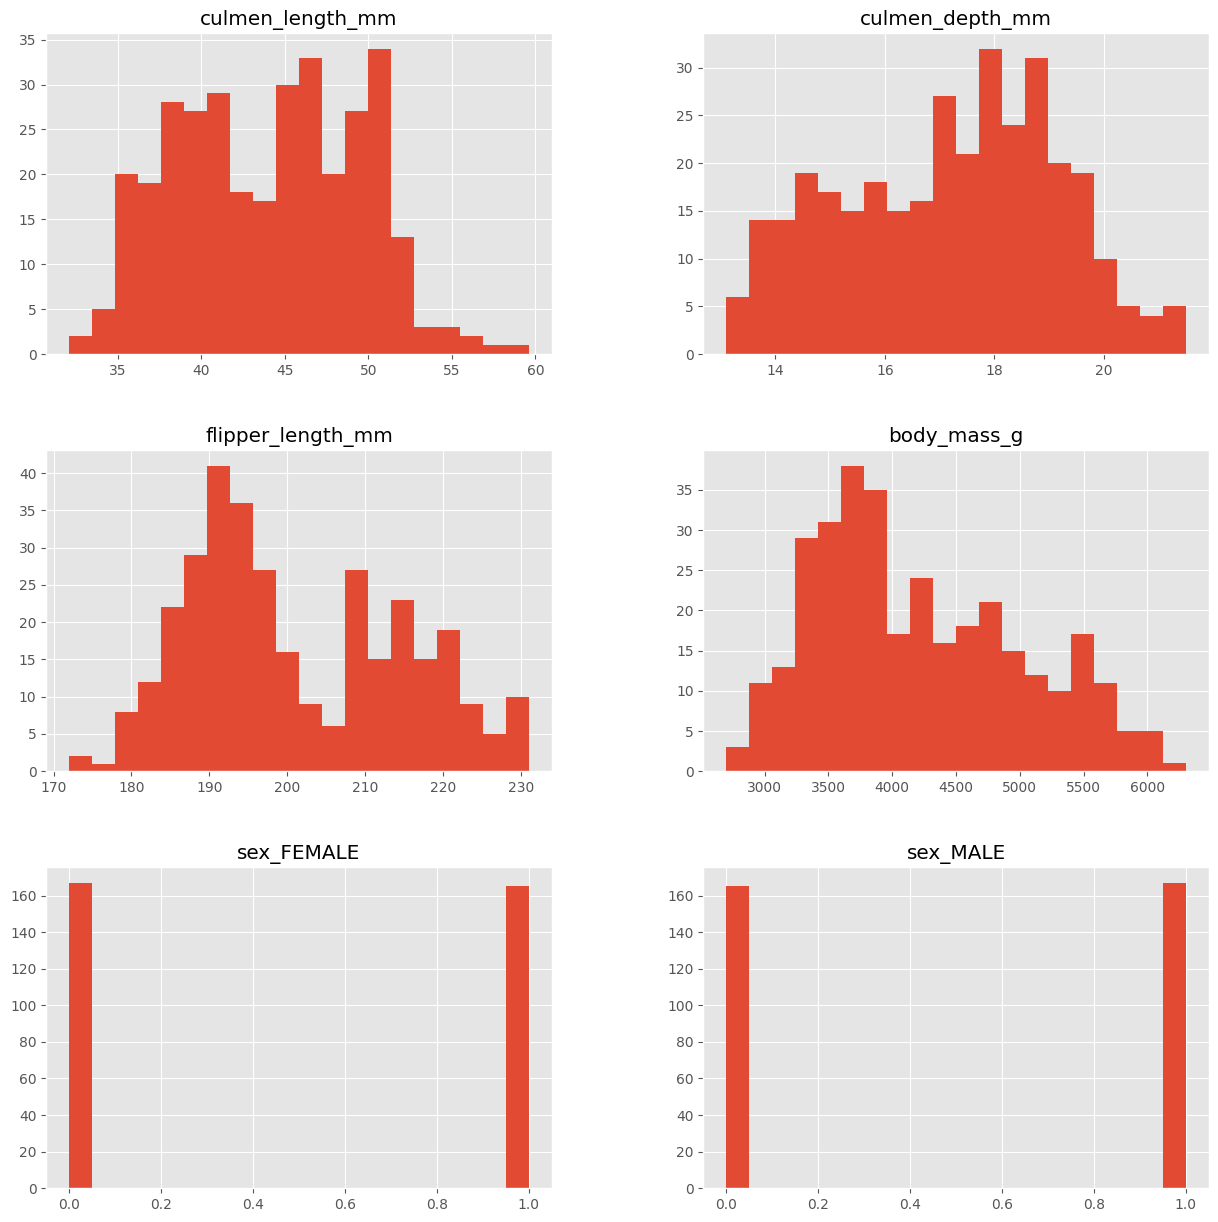

In [ ]:
penguins_df.hist(figsize=(15, 15), bins=20)
plt.plot()

In [ ]:
import numpy as np

# Create squares of each column
squares = penguins_df.drop(['sex_FEMALE', 'sex_MALE'], axis= 1).apply(lambda x: x**2)
squares.head()

# adjust column names
squares.columns = [f"{col}_squared" for col in squares.columns]
squares.head()


# create cubes
cubes = penguins_df.drop(['sex_FEMALE', 'sex_MALE'], axis= 1).apply(lambda x: x**3)
cubes.columns = [f"{col}_cubed" for col in cubes.columns]
cubes.head()

# create sine and cosine for each column
sine = penguins_df.drop(['sex_FEMALE', 'sex_MALE'], axis= 1).apply(lambda x: np.sin(x))
sine.columns = [f"{col}_sine" for col in sine.columns]
sine.head()

# cosine
cosine = penguins_df.drop(['sex_FEMALE', 'sex_MALE'], axis= 1).apply(lambda x: np.cos(x))
cosine.columns = [f"{col}_cosine" for col in cosine.columns]
cosine.head()


# concat
penguins_newdf = pd.concat([penguins_df, squares, cubes, sine, cosine], axis=1)
penguins_newdf.head()


# drop duplicate column
penguins_newdf = penguins_newdf.loc[:,~penguins_newdf.columns.duplicated()]
print(f'Shape: {penguins_newdf.shape}')
penguins_newdf.head()

Shape: (332, 22)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,culmen_length_mm_squared,culmen_depth_mm_squared,flipper_length_mm_squared,body_mass_g_squared,...,flipper_length_mm_cubed,body_mass_g_cubed,culmen_length_mm_sine,culmen_depth_mm_sine,flipper_length_mm_sine,body_mass_g_sine,culmen_length_mm_cosine,culmen_depth_mm_cosine,flipper_length_mm_cosine,body_mass_g_cosine
0,39.1,18.7,181.0,3750.0,0,1,1528.81,349.69,32761.0,14062500.0,...,5929741.0,5.273438e+10,0.985600,-0.148999,-0.936451,-0.873150,0.169092,0.988837,0.350797,0.487451
1,39.5,17.4,186.0,3800.0,1,0,1560.25,302.76,34596.0,14440000.0,...,6434856.0,5.487200e+10,0.973645,-0.992659,-0.602024,-0.970455,-0.228067,0.120944,-0.798478,0.241281
2,40.3,18.0,195.0,3250.0,1,0,1624.09,324.00,38025.0,10562500.0,...,7414875.0,3.432812e+10,0.514740,-0.750987,0.219455,0.999749,-0.857346,0.660317,0.975623,-0.022398
3,36.7,19.3,193.0,3450.0,1,0,1346.89,372.49,37249.0,11902500.0,...,7189057.0,4.106362e+10,-0.840991,0.435365,-0.978457,0.506626,0.541049,0.900254,-0.206453,0.862166
4,39.3,20.6,190.0,3650.0,0,1,1544.49,424.36,36100.0,13322500.0,...,6859000.0,4.862712e+10,0.999547,0.983907,0.997799,-0.506106,-0.030087,-0.178683,0.066307,0.862471


In [ ]:
# Step 3 - Perform preprocessing steps on the dataset - standarizing/scaling
# Scaling variables (also called standardizing) is recommended before performing a clustering algorithm since this can increase the performance greatly (see https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)
scaler = StandardScaler()
X = scaler.fit_transform(penguins_newdf)
penguinsnew_preprocessed = pd.DataFrame(data=X,columns=penguins_newdf.columns)
penguinsnew_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,culmen_length_mm_squared,culmen_depth_mm_squared,flipper_length_mm_squared,body_mass_g_squared,...,flipper_length_mm_cubed,body_mass_g_cubed,culmen_length_mm_sine,culmen_depth_mm_sine,flipper_length_mm_sine,body_mass_g_sine,culmen_length_mm_cosine,culmen_depth_mm_cosine,flipper_length_mm_cosine,body_mass_g_cosine
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994,-0.910722,0.774561,-1.371597,-0.601998,...,-1.318712,-0.620222,1.323403,-0.187022,-1.370796,-1.280484,0.205955,1.266489,0.564873,0.562753
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042,-0.845452,0.070552,-1.050022,-0.548904,...,-1.030025,-0.576210,1.306769,-1.370797,-0.918986,-1.417992,-0.366346,0.012848,-1.157363,0.210857
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042,-0.712918,0.389179,-0.449106,-1.094264,...,-0.469916,-0.999192,0.668251,-1.031697,0.190826,1.366226,-1.273129,0.791953,1.501199,-0.166068
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042,-1.288392,1.116590,-0.585096,-0.905796,...,-0.598978,-0.860513,-1.218106,0.632925,-1.427545,0.669363,0.741941,1.138534,-0.270189,1.098402
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994,-0.878170,1.894706,-0.786453,-0.706077,...,-0.787614,-0.704787,1.342809,1.402606,1.242365,-0.761791,-0.081060,-0.419952,0.138552,1.098838
5,-0.940642,0.330548,-1.425342,-0.722199,1.006042,-1.006042,-0.943108,0.281770,-1.371597,-0.731657,...,-1.318712,-0.725219,1.249325,-1.194763,-1.370796,-0.594187,0.483255,0.557429,0.564873,1.183745
6,-0.885538,1.250172,-0.426399,0.581912,-0.993994,0.993994,-0.894467,1.291655,-0.449106,0.494083,...,-0.469916,0.397720,1.340040,0.978937,0.190826,0.384693,0.062950,0.894610,1.501199,1.227237
7,-0.536545,0.228367,-1.353989,-1.250054,1.006042,-1.006042,-0.577728,0.175561,-1.307983,-1.139622,...,-1.262230,-1.031313,-0.404709,-1.309319,-0.390420,1.308425,-1.430520,0.294230,1.504062,-0.539912
8,-0.995746,2.067616,-0.711811,-0.504847,-0.993994,0.993994,-0.991376,2.270937,-0.719685,-0.548904,...,-0.725392,-0.576210,1.042728,1.019906,0.698062,-1.417992,0.857025,-1.177351,-1.165329,0.210857
9,-1.363106,0.330548,-1.139930,-0.629049,1.006042,-1.006042,-1.303610,0.281770,-1.115038,-0.654389,...,-1.089024,-0.663076,-1.287416,-1.194763,0.362628,-1.056520,0.617062,0.557429,-1.366450,0.865825


In [ ]:
# Step 4: PCA
from sklearn.decomposition import PCA

#
pca = PCA(n_components=0.95)
#pca = PCA()
principalComponents = pca.fit_transform(penguinsnew_preprocessed)
#principalDf = pd.DataFrame(data = principalComponents
 #            , columns = ['principal component 1', 'principal component 2'])
#principalDf.head()

penguins_preprocessed =  pd.DataFrame(principalComponents)#.head()
penguins_preprocessed.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-3.171656,1.526155,-0.040822,0.721606,0.243819,0.619424,-1.628066,-0.836733,1.209442,-0.731410,0.889143
1,-2.641449,-1.249848,0.826265,0.056226,-0.812131,-0.719002,-2.262693,-0.295162,0.223004,-0.390274,0.103480
2,-2.773150,-1.012052,0.288683,0.284726,1.471898,-1.187576,1.255149,-0.059184,0.723882,-0.416681,0.095235
3,-3.402983,-0.415658,-0.207971,-1.054097,-0.414726,2.019360,0.574786,-1.019348,0.929445,1.198556,-0.386460
4,-2.811244,2.557391,-0.640420,1.827356,-1.443313,0.212512,0.199545,-0.080848,1.018527,-0.487988,-1.836411


In [ ]:
penguins_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       332 non-null    float64
 1   1       332 non-null    float64
 2   2       332 non-null    float64
 3   3       332 non-null    float64
 4   4       332 non-null    float64
 5   5       332 non-null    float64
 6   6       332 non-null    float64
 7   7       332 non-null    float64
 8   8       332 non-null    float64
 9   9       332 non-null    float64
 10  10      332 non-null    float64
dtypes: float64(11)
memory usage: 28.7 KB



k=3, Silhouette Score: 0.264211712790802
k=4, Silhouette Score: 0.2651304715549642
k=5, Silhouette Score: 0.2614850920197278
k=6, Silhouette Score: 0.25107089767044843
k=7, Silhouette Score: 0.23442565551129782
k=8, Silhouette Score: 0.21451250396859056
k=9, Silhouette Score: 0.18906114245738292



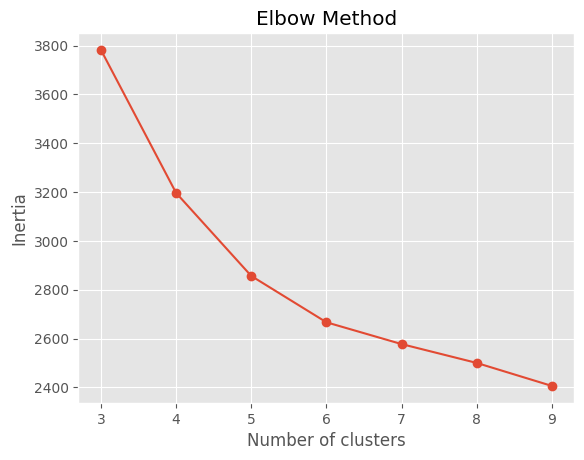


  Based on the score, k=4 is the best choice 



In [ ]:
# Step 5 - Detect the optimal number of clusters for k-means clustering
inertia = []
print()
for k in range(3, 10): # Start from 2 since silhouette score isn't defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_preprocessed)
    if k == 2:
        print(f'Silhouette Scores:')
    score = silhouette_score(penguins_preprocessed, kmeans.labels_)
    inertia.append(kmeans.inertia_)
    print(f'k={k}, Silhouette Score: {score}')
print()
plt.plot(range(3, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


print(f'\n  Based on the score, k=4 is the best choice \n')
n_clusters = 4

# Step 5 - Run the k-means clustering algorithm
# with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

The feature engineering procedures combined with PCA, did not enhance data modelling.

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

len(kmeans.labels_)

len(penguins_df['label'])

penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,label
0,39.1,18.7,181.0,3750.0,0,1,0
1,39.5,17.4,186.0,3800.0,1,0,2
2,40.3,18.0,195.0,3250.0,1,0,2
3,36.7,19.3,193.0,3450.0,1,0,2
4,39.3,20.6,190.0,3650.0,0,1,0


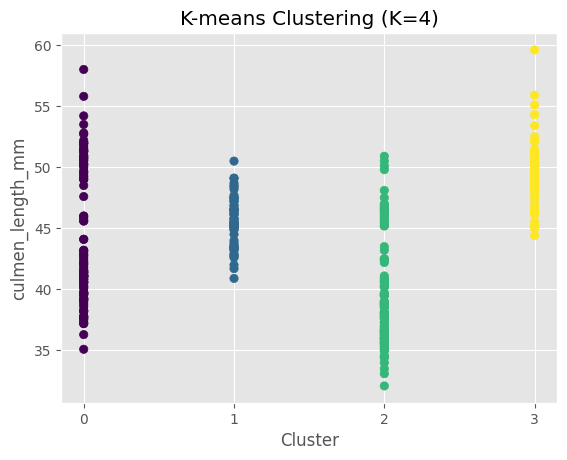

In [ ]:
# Step 5 - Run the k-means clustering algorithm
# with the optimal number of clusters

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

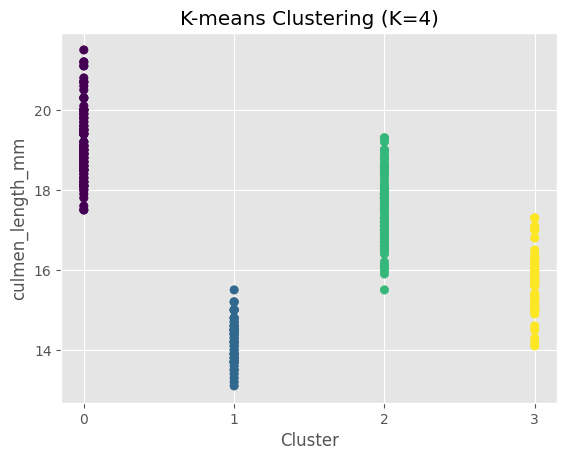

In [ ]:
# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['label'], penguins_df['culmen_depth_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

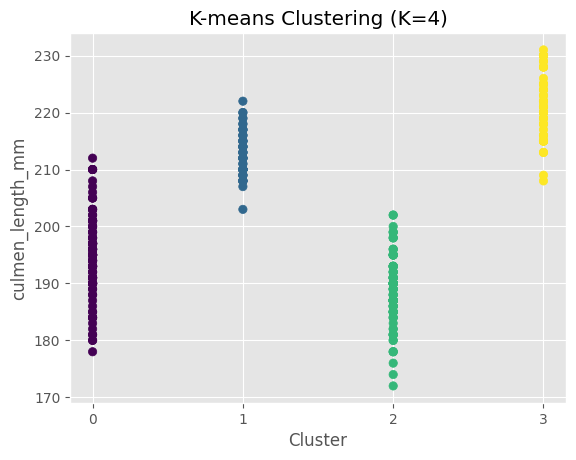

In [ ]:
# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['label'], penguins_df['flipper_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

> The feature engineering procedures combined with PCA, did not enhance data modelling nor performance.

In [ ]:
# The End !!